In [1]:
#Load in the dataset
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('cirrhosis.csv')
column_to_check = 'Stage'
df.dropna(subset=[column_to_check], inplace=True)

df.tail()



ID  N_Days Status Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
413  414     681      D  NaN  24472   F     NaN          NaN     NaN     N   
414  415    1103      C  NaN  14245   F     NaN          NaN     NaN     N   
415  416    1055      C  NaN  20819   F     NaN          NaN     NaN     N   
416  417     691      C  NaN  21185   F     NaN          NaN     NaN     N   
417  418     976      C  NaN  19358   F     NaN          NaN     NaN     N   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  Tryglicerides  \
413        1.2          NaN     2.96     NaN       NaN   NaN            NaN   
414        0.9          NaN     3.83     NaN       NaN   NaN            NaN   
415        1.6          NaN     3.42     NaN       NaN   NaN            NaN   
416        0.8          NaN     3.75     NaN       NaN   NaN            NaN   
417        0.7          NaN     3.29     NaN       NaN   NaN            NaN   

     Platelets  Prothrombin  Stage  
413      174.0         10.9    3.0  
414      180.0         11.2    4.0  
415      143.0          9.9    3.0  
416      269.0         10.4    3.0  
417      350.0         10.6    4.0

In [2]:
#Datatypes
print(df.dtypes)


ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [3]:
#Percent M/F
females = len(df[df['Sex'] == 'F'])
males = len(df[df['Sex'] == 'M'])
total = len(df)
print(males/total) #11% males
print(females/total) #89% females

0.10679611650485436
0.8932038834951457


In [4]:
#missing values -- Drug, Ascites, Hepatomology, Spiders, Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values > 0:
        print(col, (missing_values/len(df[col])), 'missing values')

print('12 out of', len(df.columns), 'columns have missing values')

Drug 0.24271844660194175 missing values
Ascites 0.24271844660194175 missing values
Hepatomegaly 0.24271844660194175 missing values
Spiders 0.24271844660194175 missing values
Cholesterol 0.3106796116504854 missing values
Copper 0.24757281553398058 missing values
Alk_Phos 0.24271844660194175 missing values
SGOT 0.24271844660194175 missing values
Tryglicerides 0.3155339805825243 missing values
Platelets 0.02669902912621359 missing values
Prothrombin 0.0048543689320388345 missing values
12 out of 20 columns have missing values


In [5]:
#Exploring the target variable
print(df['Status'].value_counts())

Status
C     230
D     157
CL     25
Name: count, dtype: int64


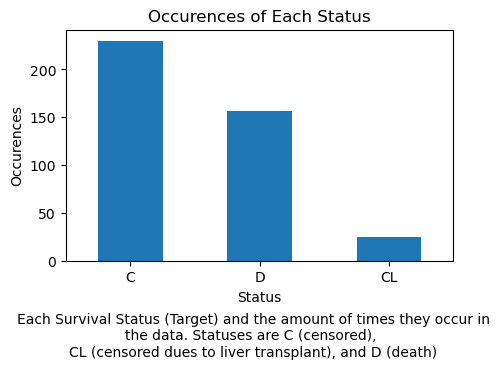

In [6]:
#Status (Target) -- categorical
plt.figure(figsize=(5,3))
pd.value_counts(df['Status']).plot.bar()
plt.title('Occurences of Each Status')
plt.ylabel('Occurences')
plt.xlabel('Status')
txt='''Each Survival Status (Target) and the amount of times they occur in the data. Statuses are C (censored), 
CL (censored dues to liver transplant), and D (death)'''
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.xticks(rotation=360)
plt.show()

In [7]:
#Stage -- Ordinal
pd.value_counts(df['Stage'])

Stage
3.0    155
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [8]:
df_correct_order = df
correct_order = [1, 2, 3, 4]

pd.value_counts(df_correct_order['Stage']).reindex(correct_order)

Stage
1     21
2     92
3    155
4    144
Name: count, dtype: int64

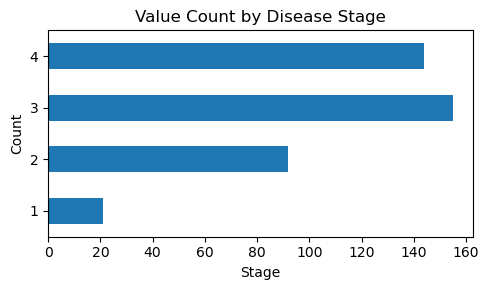

In [9]:
plt.figure(figsize=(5,3))

pd.value_counts(df_correct_order['Stage']).reindex(correct_order).plot.barh()
plt.ylabel('Count')
plt.xlabel('Stage')
plt.title('Value Count by Disease Stage')
plt.tight_layout()
plt.show()

In [10]:
#Platelets -- Continuous
print(df['Platelets'].describe())

count    401.000000
mean     256.102244
std       95.750598
min       62.000000
25%      189.000000
50%      249.000000
75%      318.000000
max      563.000000
Name: Platelets, dtype: float64


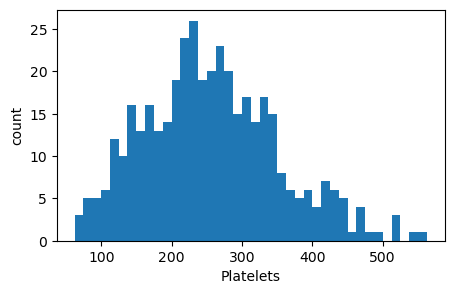

In [11]:
plt.figure(figsize=(5,3))

df['Platelets'].plot.hist(bins = int(2 * np.sqrt(df.shape[0])))
plt.xlabel('Platelets')
plt.ylabel('count')
plt.show()

In [12]:
#Continuous vs. Categorical -- stacked bar plot
count_matrix = df.groupby(['Ascites', 'Status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) #important -- no instance of CL and Y


Status       C    CL      D
Ascites                    
N        167.0  19.0  102.0
Y          1.0   NaN   23.0
Status          C        CL         D
Ascites                              
N        0.579861  0.065972  0.354167
Y        0.041667       NaN  0.958333


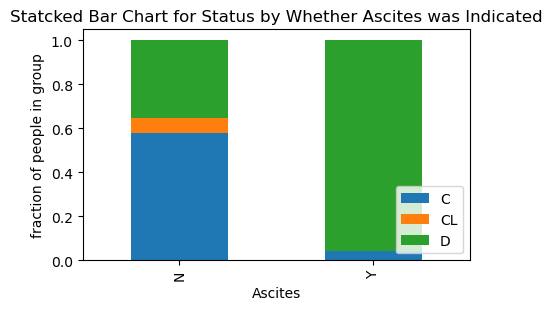

In [13]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Ascites was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [14]:
count_matrix = df.groupby(['Hepatomegaly', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) 

Status               C        CL         D
Hepatomegaly                              
N             0.710526  0.046053  0.243421
Y             0.375000  0.075000  0.550000


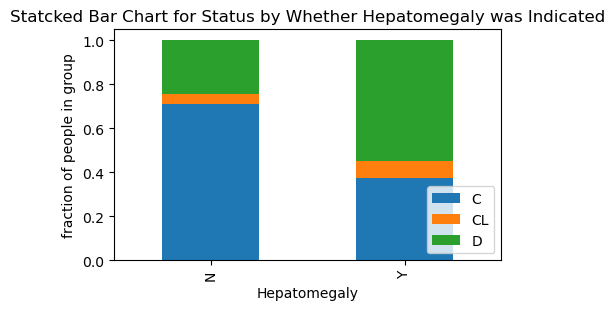

In [15]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Hepatomegaly was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [16]:
count_matrix = df.groupby(['Spiders', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) 

Status          C        CL         D
Spiders                              
N        0.608108  0.063063  0.328829
Y        0.366667  0.055556  0.577778


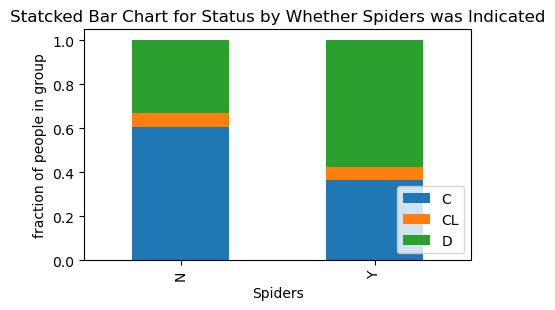

In [17]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Spiders was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [18]:
count_matrix = df.groupby(['Edema', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) #important that there are no instances of CL and Y

Status         C        CL         D
Edema                               
N       0.614943  0.063218  0.321839
S       0.340909  0.068182  0.590909
Y       0.050000       NaN  0.950000


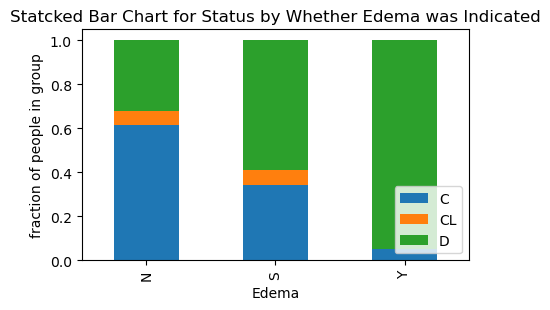

In [19]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.title('Statcked Bar Chart for Status by Whether Edema was Indicated')
plt.legend(loc=4)
plt.show()

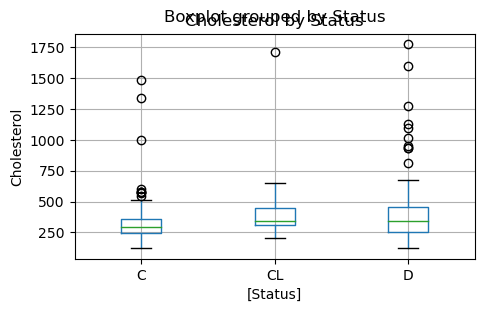

In [20]:
#Continuous vs. Categorical -- hist, box plot, violin
#avoided a category-specific histogram because the target variable has 3 categories
#Billrubin
df[['Cholesterol','Status']].boxplot(by='Status',figsize=(5,3))
plt.ylabel('Cholesterol')
plt.title('Cholesterol by Status')
plt.show() 

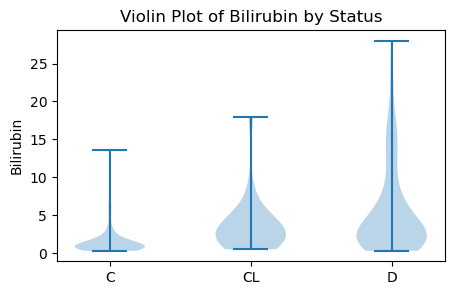

In [21]:
#Violin Plot for Bilirubin
dataset = [df[df['Status']=='C']['Bilirubin'].values,
           df[df['Status']=='CL']['Bilirubin'].values, 
           df[df['Status']=='D']['Bilirubin'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['C','CL', 'D'])
plt.ylabel('Bilirubin')
plt.title('Violin Plot of Bilirubin by Status')
plt.show()

In [22]:
#Testing the outputs of splitting -- since the data is iid, we can use regular 60,20,20 split, but only 25 CL, so we need to use Stratified Kfolds
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)

# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 168

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 


X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))


kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))


test balance: (array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([138,  15,  93]))
(array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([138,  15,  94]))
(array([0, 1, 2]), array([46,  5, 31]))
new fold
(array([0, 1, 2]), array([138,  15,  94]))
(array([0, 1, 2]), array([46,  5, 31]))
new fold
(array([0, 1, 2]), array([138,  15,  94]))
(array([0, 1, 2]), array([46,  5, 31]))


In [23]:
#Check that the lengths of the groups are correct
print(len(X_train))
print(len(X_test))
print(len(X_val))

247
83
82


In [24]:
X_train['Stage'].unique()

array([1., 3., 4., 2.])

In [25]:
df.tail()

N_Days  Status    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
413     681       2  24472   F     NaN          NaN     NaN     N        1.2   
414    1103       0  14245   F     NaN          NaN     NaN     N        0.9   
415    1055       0  20819   F     NaN          NaN     NaN     N        1.6   
416     691       0  21185   F     NaN          NaN     NaN     N        0.8   
417     976       0  19358   F     NaN          NaN     NaN     N        0.7   

     Cholesterol  Albumin  Copper  Alk_Phos  SGOT  Tryglicerides  Platelets  \
413          NaN     2.96     NaN       NaN   NaN            NaN      174.0   
414          NaN     3.83     NaN       NaN   NaN            NaN      180.0   
415          NaN     3.42     NaN       NaN   NaN            NaN      143.0   
416          NaN     3.75     NaN       NaN   NaN            NaN      269.0   
417          NaN     3.29     NaN       NaN   NaN            NaN      350.0   

     Prothrombin  Stage  
413         10.9    3.0  
414         11.2    4.0  
415          9.9    3.0  
416         10.4    3.0  
417         10.6    4.0

In [26]:
df['Stage'].unique()

array([4., 3., 2., 1.])

In [27]:
#Examining the output of preprocessing the data without dealing with missing values

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)
print(X_test_prep.shape)

# collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print(df_test.shape)


(83, 26)
(247, 26)
(82, 26)
(83, 26)


In [28]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (247, 26)
fraction of missing values in features:
num__Cholesterol      0.348178
num__Copper           0.279352
num__Alk_Phos         0.271255
num__SGOT             0.271255
num__Tryglicerides    0.352227
num__Platelets        0.028340
num__Prothrombin      0.004049
dtype: float64
fraction of points with missing values: 0.3684210526315789


In [29]:
mask = df_test[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets']].isnull()

unique_rows, counts = np.unique(mask, axis=0,return_counts=True)
print(unique_rows.shape) # 6 patterns, we will train 6 models
for i in range(len(counts)):
    print(unique_rows[i],counts[i])

#Only 6 groupings so can def use this! May be a way to increase model accuracy

(4, 6)
[False False False False False False] 63
[ True False False False  True False] 4
[ True  True  True  True  True False] 15
[ True  True  True  True  True  True] 1


In [30]:
def random_splitting_preprocessing(X, y, random_state):
    ordinal_ftrs = ['Stage'] 
    ordinal_cats = [[ 1.,  2.,  3., 4.]]
    onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
    std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

    # one-hot encoder -- categorical
    # Make the missing values categories
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

    # ordinal encoder
    #Make the missing values categories
    ordinal_transformer = Pipeline(steps=[
        ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
        ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

        ])

    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, std_ftrs),
            ('cat', categorical_transformer, onehot_ftrs),
            ('ord', ordinal_transformer, ordinal_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)]) 
    
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
    # print('test balance:',np.unique(y_test,return_counts=True))


    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
    for train_index, val_index in kf.split(X_other,y_other):
        # print('new fold')
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        # print(np.unique(y_train,return_counts=True))
        # print(np.unique(y_val,return_counts=True))

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    # collect feature names
    feature_names = preprocessor.get_feature_names_out()

    df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
    # print(df_train.shape)

    # transform the CV
    df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
    # print(df_CV.shape)

    # transform the test
    df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
    # print(df_test.shape)

    return df_train, y_train, df_CV, y_val, df_test, y_test

In [31]:
def reduced_feature_xgb(X_train, Y_train, X_CV, y_CV, X_test, y_test):
    
    #list of all of the split train and test sets.
    data = []

    # find all unique patterns of missing value in test set
    mask = X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    # print(unique_rows[0])
    
    print('there are', len(unique_rows), 'unique missing value patterns.')
    
    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
        #list of the train, val, and test sets
        index_sets = []
        print ('working on unique pattern', i)
        ## generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=float)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern

                sub_X_test = pd.concat([sub_X_test,X_test.iloc[[j]]])# append the according X_test row j to the subset
                sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])# append the according y_test row j

        sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        index_sets.append(sub_X_test)
        index_sets.append(sub_y_test)
        
        ## choose the according reduced features for subgroups
        sub_X_train = pd.DataFrame()
        sub_Y_train = pd.DataFrame()
        sub_X_CV = pd.DataFrame()
        sub_y_CV = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test
        sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
        sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_train = sub_X_train.dropna()
        sub_X_CV = sub_X_CV.dropna()   
        # 3.cut the sub_Y_train and sub_y_CV accordingly
        sub_Y_train = Y_train.iloc[sub_X_train.index]
        sub_y_CV = y_CV.iloc[sub_X_CV.index]

        index_sets.append(sub_X_CV)
        index_sets.append(sub_y_CV)
        index_sets.append(sub_X_train)
        index_sets.append(sub_Y_train)

        data.append(index_sets)

        
        # # run XGB
        # sub_y_test_pred = xgb_model(sub_X_train, sub_Y_train, sub_X_CV, 
        #                                sub_y_CV, sub_X_test, sub_y_test, verbose=0)
        # sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
        #                                   index=sub_y_test.index)
        # print('   RMSE:',np.sqrt(mean_squared_error(sub_y_test,sub_y_test_pred)))
        # # collect the test predictions
        # all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])
        
    # rank the final y_test_pred according to original y_test index
    # all_y_test_pred = all_y_test_pred.sort_index()
    # y_test = y_test.sort_index()
               
    # # get global RMSE
    # total_RMSE = np.sqrt(mean_squared_error(y_test,all_y_test_pred))
    # total_R2 =  r2_score(y_test,all_y_test_pred)
    # return total_RMSE, total_R2
    return data, len(unique_rows)

In [32]:
df_train, y_train, df_CV, y_val, df_test, y_test = random_splitting_preprocessing(X, y, 42)
data = reduced_feature_xgb(df_train.loc[:, df_train.columns != 'Status'], y_train, df_CV.loc[:, df_CV.columns != 'Status'], y_val, df_test.loc[:, df_test.columns != 'Status'], y_test)
print(len(data[0]))
print(len(data[0][0]), len(data[1][0]), len(data[2][0]), len(data[3][0]), len(data[4][0]), len(data[5][0]), len(data[6][0]))
# print(df_train.loc[:, df_train.columns != 'Status'].shape)

there are 7 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
working on unique pattern 6
7


TypeError: 'int' object is not subscriptable

In [ ]:
# #Now we want to test what the preprocessed data would look like if we used Iterative Imputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor

# # Specify the column and drop rows with NaN in that column
# X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
# print('test balance:',np.unique(y_test,return_counts=True))


# kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
# for train_index, val_index in kf.split(X_other,y_other):
#     print('new fold')
#     X_train = X_other.iloc[train_index]
#     y_train = y_other.iloc[train_index]
#     X_val = X_other.iloc[val_index]
#     y_val = y_other.iloc[val_index]
#     print(np.unique(y_train,return_counts=True))
#     print(np.unique(y_val,return_counts=True))


# #Now need to process the categorical, ordinal, and numerical variables
# ordinal_ftrs = ['Stage'] 
# ordinal_cats = [[ 1.,  2.,  3., 4.]]
# onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
# std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# # one-hot encoder -- categorical
# # Make the missing values categories
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
#     ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# # ordinal encoder
# #Make the missing values categories
# ordinal_transformer = Pipeline(steps=[
#     ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
#     ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

#     # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
#     ])

# # standard scaler
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler()), 
#     ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=42), max_iter=20,random_state=42))])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, std_ftrs),
#         ('cat', categorical_transformer, onehot_ftrs),
#         ('ord', ordinal_transformer, ordinal_ftrs)])

# clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

# X_train_prep = clf.fit_transform(X_train)
# X_val_prep = clf.transform(X_val)
# X_test_prep = clf.transform(X_test)

# # collect feature names
# feature_names = preprocessor.get_feature_names_out()

# df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
# print(df_train.shape)

# # transform the CV
# df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
# print(df_CV.shape)

# # transform the test
# df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
# print(df_test.shape)



In [33]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (247, 26)
fraction of missing values in features:
num__Cholesterol      0.303644
num__Copper           0.234818
num__Alk_Phos         0.226721
num__SGOT             0.226721
num__Tryglicerides    0.303644
num__Platelets        0.020243
dtype: float64
fraction of points with missing values: 0.3157894736842105


In [34]:

print(df_train[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets', 'ord__Stage']].tail())

     num__Cholesterol  num__Copper  num__Alk_Phos  num__SGOT  \
242               NaN     0.111595       4.388203  -0.335093   
243               NaN          NaN            NaN        NaN   
244         -0.333589    -0.512412      -0.485208   0.021008   
245               NaN    -0.421647      -0.335690   0.833479   
246         -0.508075    -0.535103      -0.406336  -0.896298   

     num__Tryglicerides  num__Platelets  ord__Stage  
242                 NaN        1.064860         3.0  
243                 NaN       -0.293222         2.0  
244           -1.163618        0.838513         1.0  
245                 NaN       -0.159472         2.0  
246           -0.365877       -1.785055         3.0  


In [35]:
print(y_test)

144    0
167    0
399    0
19     2
356    0
      ..
231    0
50     2
180    0
289    0
64     0
Name: Status, Length: 83, dtype: int64


In [92]:
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

#Manipulating the data so that it is prepped for preprocessing
df = pd.read_csv('cirrhosis.csv')
df.tail()

df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)
# column_to_check = 'Stage'
# df.dropna(subset=[column_to_check], inplace=True)


# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 42

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 

#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


def StratKFoldF1(X, y, ML_Algo, param_grid):
    '''Main function that can be used to train our models, 
    -- preprocesses with StratifiedKFold, 
    -- CV is GridSearchCV
    -- F1 Score as evaluation metric
    '''
    nr_states = 5
    test_scores = []
    final_models = []
    total_scores = []
    # for j in range(20):
    #     categorical_transformer = Pipeline(steps=[
    #             ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    #             ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

    #     # ordinal encoder
    #     #Make the missing values categories
    #     ordinal_transformer = Pipeline(steps=[
    #         ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    #         ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    #         ])

    #     # standard scaler
    #     numeric_transformer = Pipeline(steps=[
    #         ('scaler', StandardScaler()), 
    #         ('imperative', IterativeImputer(estimator = RandomForestRegressor(
    #             n_estimators=1, random_state=random_state), 
    #                                         max_iter=j, random_state=random_state))])


    #     preprocessor = ColumnTransformer(
    #         transformers=[
    #             ('num', numeric_transformer, std_ftrs),
    #             ('cat', categorical_transformer, onehot_ftrs),
    #             ('ord', ordinal_transformer, ordinal_ftrs)])
    for j in range(nr_states):
        y_pred_list = []
        y_actual_list = []
        df_train, y_train, df_CV, y_val, df_test, y_test = random_splitting_preprocessing(X, y, j)
        data, unique_combos = reduced_feature_xgb(df_train.loc[:, df_train.columns != 'Status'], y_train, df_CV.loc[:, df_CV.columns != 'Status'], y_val, df_test.loc[:, df_test.columns != 'Status'], y_test)
        print(len(data))
        print(len(data[0]))

        all_y_test_pred = pd.DataFrame()
        y_labels = pd.DataFrame()
        # first split to separate out the test set
        # X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

        # StratifiedKFold to split  other
        kf = StratifiedKFold(n_splits=6,shuffle=True,random_state=42*j)

        pipe = Pipeline([('classifier', ML_Algo)])
        
        for i in range(unique_combos): #try 6 and 7
            #GridSearchCV with StratifiedKFold and f1 as scoring
            grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'f1_weighted',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
            grid.fit(data[i][4], data[i][5]) 

            print('best model parameters:',grid.best_params_)
            print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
            # save the model
            final_models.append(grid)
            # calculate and save the test score
            sub_y_test_pred = final_models[-1].predict(data[i][0])
            # print(sub_y_test_pred)
            y_pred_list.append(sub_y_test_pred)
            y_actual_list.append(data[i][1].to_list())


            sub_y_test_pred = pd.DataFrame(sub_y_test_pred, columns=['sub_y_test_pred'],
                                          index=data[i][1].index)

            # print(data[i][1].to_list())
            y_test_labels = pd.DataFrame(data[i][1], columns=['true_labels'],
                                          index=data[i][1].index)
            #master df
            all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred.reset_index(drop=True)])
            y_labels = pd.concat([y_labels, y_test_labels.reset_index(drop=True)])

            #add raw scores
            test_scores.append(f1_score(data[i][1],sub_y_test_pred, average='weighted'))
            # test_scores[i] = f1_score(y_test,y_test_pred, average='weighted')
            print('test score:',test_scores[i])

        #sort indices
        all_y_test_pred = all_y_test_pred.sort_index() #too late
        y_labels = y_labels.sort_index()

        #global score
        # print(y_test)
        # print(all_y_test_pred)
        y_pred_list_flattened = np.concatenate(y_pred_list)
        y_actual_list_flattened = np.concatenate(y_actual_list)
        total_f1 =  f1_score(y_actual_list_flattened,y_pred_list_flattened, average='weighted') #y_test from the beginning
        total_scores.append(total_f1)
        # print(y_pred_list_flattened)
        # print(y_actual_list)
    return total_scores, final_models

In [91]:
param_grid = {
        'classifier__C': [0.1, 0.5, 1, 5, 10, 100],
        'classifier__gamma': [0.1, 1, 10, 100],
    }

clf = SVC(max_iter=10000, random_state=42)

svc_test_scores, svc_final_models = StratKFoldF1(X, y, clf, param_grid)

print('list of test scores:', svc_test_scores)
print('The mean of the test scores is:', np.mean(svc_test_scores))
print('The standard deviation of the test scores is:', np.std(svc_test_scores))

#issue is there is no randomness in original split. Need to make that a function and feed it, that then feeds into the main function.

#Best model for f1 is the second one! 


there are 6 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
6
6
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'classifier__C': 0.5, 'classifier__gamma': 0.1}
validation score: 0.7358726779435897
test score: 0.6795728017087932
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'classifier__C': 1, 'classifier__gamma': 0.1}
validation score: 0.7519536686519609
test score: 0.8
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'classifier__C': 1, 'classifier__gamma': 0.1}
validation score: 0.7108788916838936
test score: 0.75
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'classifier__C': 5, 'classifier__gamma': 0.1}
validation score: 0.700514054498436
test score: 0.0
Fitting 6 folds for each of 

In [93]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
              'classifier__max_depth': [1, 5, 10, 15, 20], # the max_depth should be smaller or equal than the number of features roughly
              'classifier__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1] # linearly spaced between 0.5 and 1
              } 

clf = RandomForestClassifier(random_state=42)

rf_test_scores, rf_final_models = StratKFoldF1(X, y, clf, param_grid)

print('list of test scores:', rf_test_scores)
print('The mean of the test scores is:', np.mean(rf_test_scores))
print('The standard deviation of the test scores is:', np.std(rf_test_scores))

there are 6 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
6
6
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'classifier__max_depth': 15, 'classifier__max_features': 1}
validation score: 0.7470101835056494
test score: 0.6957332109881287
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'classifier__max_depth': 5, 'classifier__max_features': 1}
validation score: 0.7611404134619607
test score: 0.8
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'classifier__max_depth': 15, 'classifier__max_features': 0.7}
validation score: 0.7302448395310163
test score: 0.7162534435261708
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'classifier__max_depth': 5, 'classifier__max_features': 1}
validation s

In [94]:
from sklearn.linear_model import LogisticRegression
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__penalty': ['l1', 'l2', 'elasticnet']
}

clf = LogisticRegression(max_iter=10000, random_state=42)

lr_test_scores, lr_final_models = StratKFoldF1(X, y, clf, param_grid_lr)

print('list of test scores:', lr_test_scores)
print('The mean of the test scores is:', np.mean(lr_test_scores))
print('The standard deviation of the test scores is:', np.std(lr_test_scores))

there are 6 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
6
6
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
validation score: 0.7335566622801702
test score: 0.6564881081471843
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
validation score: 0.7399254661350892
test score: 0.8
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
validation score: 0.7333211552239022
test score: 0.75
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
validation score: 0.7363702876705616
test score: 0.0
Fitting 6 fol

In [95]:
from sklearn.neighbors import KNeighborsClassifier
#NEED TO FIX THE WARNINGS

param_grid_knc = {
    'classifier__n_neighbors': [3, 5, 7, 10, 13],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
}

clf_knc = KNeighborsClassifier()

knc_test_scores, knc_best_model = StratKFoldF1(X, y, clf_knc, param_grid_knc)

print('List of test scores:', knc_test_scores)
print('The mean of the test scores is:', np.mean(knc_test_scores))
print('The standard deviation of the test scores is:', np.std(knc_test_scores))

there are 6 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
6
6
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
validation score: 0.7081371445267296
test score: 0.7138364779874214
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
validation score: 0.7078418198848307
test score: 0.8
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
validation score: 0.6636419552956822
test score: 0.6265356265356264
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
validation score: 0.6516435975810522
test score: 0.0
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
validation score: 0.6690173234840996
test score: 1.0
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
validation score: 0.6989616994060474
test score: 0.0
there are 7 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
working on unique pattern 6
7
6
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
validation score: 0.7493070931235072
test score: 0.7138364779874214
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
validation score: 0.7333572734308028
test score: 0.8
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
validation score: 0.7207937674645192
test score: 0.6265356265356264
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
validation score: 0.7375384232335486
test score: 0.0
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
validation score: 0.6941836937999689
test score: 1.0
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
validation score: 0.7066168144925268
test score: 0.0
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
validation score: 0.7124432679579175
test score: 0.709488510007413
there are 6 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
6
6
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
validation score: 0.7138884205813171
test score: 0.7138364779874214
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
validation score: 0.7440935953668012
test score: 0.8
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 13, 'classifier__weights': 'distance'}
validation score: 0.7177859515509412
test score: 0.6265356265356264
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
validation score: 0.716916785129026
test score: 0.0
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
validation score: 0.7154821652651631
test score: 1.0
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
validation score: 0.7142670148993409
test score: 0.0
there are 5 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
5
6
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
validation score: 0.7062808515014397
test score: 0.7138364779874214
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
validation score: 0.7373012462038395
test score: 0.8
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
validation score: 0.7122215431079749
test score: 0.6265356265356264
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 13, 'classifier__weights': 'distance'}
validation score: 0.7071283140607068
test score: 0.0
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
validation score: 0.7077831525564489
test score: 1.0
there are 6 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
6
6
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
validation score: 0.7018651488294557
test score: 0.7138364779874214
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
validation score: 0.7044550580063235
test score: 0.8
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
validation score: 0.7303907951881858
test score: 0.6265356265356264
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
validation score: 0.7165607291849626
test score: 0.0
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
validation score: 0.6887925137707279
test score: 1.0
Fitting 6 folds for each of 30 candidates, totalling 180 fits


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator,

best model parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
validation score: 0.7155179412208601
test score: 0.0
List of test scores: [0.6694909451918798, 0.718672515735266, 0.7192580811001863, 0.6391747376916868, 0.7496729461015176]
The mean of the test scores is: 0.6992538451641073
The standard deviation of the test scores is: 0.03953395839253576


In [ ]:
for num in [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2]:
    print(num)

In [ ]:
# #XGBoost without impution
# from xgboost import XGBClassifier

# param_grid_xgb = {
#     'xgbclassifier__max_depth': [3, 5, 7],
#     "xgbclassifier__reg_alpha": [0.01, 0.1, 1, 10, 100],
#     "xgbclassifier__reg_lambda": [0.01, 0.1, 1, 10, 100]
# }

# clf_xgb = XGBClassifier(random_state=42)


# nr_states = 5
# xgb_test_scores = []
# xgb_final_models = []

# categorical_transformer = Pipeline(steps=[
#         ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
#         ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# # ordinal encoder
# #Make the missing values categories
# ordinal_transformer = Pipeline(steps=[
#     ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
#     ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

#     ])

# # standard scaler
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler()), 
#     ])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, std_ftrs),
#         ('cat', categorical_transformer, onehot_ftrs),
#         ('ord', ordinal_transformer, ordinal_ftrs)])
# for i in range(nr_states):
#     # first split to separate out the test set
#     X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

#     # StratifiedKFold to split  other
#     kf = StratifiedKFold(n_splits=6,shuffle=True,random_state=42*i)

#     #Under the hood pipeline
#     pipe = make_pipeline(preprocessor,clf_xgb)

#     #GridSearchCV with StratifiedKFold and f1 as scoring
#     grid = GridSearchCV(pipe, param_grid=param_grid_xgb,scoring = 'f1_weighted',
#                         cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    
#     # this line actually fits the model on other
#     grid.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
#     # save results into a data frame. 
#     results = pd.DataFrame(grid.cv_results_)
#     #print(results)

#     print('best model parameters:',grid.best_params_)
#     print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
#     # save the model
#     xgb_final_models.append(grid)
#     # calculate and save the test score
#     y_test_pred = xgb_final_models[-1].predict(X_test)
#     xgb_test_scores.append(f1_score(y_test,y_test_pred, average='weighted'))
#     # test_scores[i] = f1_score(y_test,y_test_pred, average='weighted')
#     print('test score:',xgb_test_scores[i])
    
# print('List of test scores:', xgb_test_scores)
# print('The mean of the test scores is:', np.mean(xgb_test_scores))
# print('The standard deviation of the test scores is:', np.std(xgb_test_scores))

In [114]:
#XGBoost without impution
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import ParameterGrid

df = pd.read_csv('cirrhosis.csv')
column_to_check = 'Stage'
df.dropna(subset=[column_to_check], inplace=True)

df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)

# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 42

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 

ftrs = df.columns

ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

xgb_test_scores = []
xgb_final_models = []
xgb_test_sets = []
xgb_y_sets = []

# parameters to try 
param_grid_xgb = {
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__reg_alpha': [0.01, 0.1, 1, 10, 100],
    'xgbclassifier__reg_lambda': [0.01, 0.1, 1, 10, 100],
    'xgbclassifier__colsample_bytree': [0.9], 
    'xgbclassifier__subsample': [0.66]

}


for i in range(5):
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42*i)
    print('test balance:',np.unique(y_test,return_counts=True))
    xgb_test_sets.append(X_test)
    xgb_y_sets.append(y_test)

    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)

    # Under the hood pipeline
    pipe = make_pipeline(preprocessor,xgboost.XGBClassifier())

    #GridSearchCV with StratifiedKFold and f1 as scoring
    XGB = GridSearchCV(pipe, param_grid=param_grid_xgb, scoring = 'f1_weighted',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    
    # this line actually fits the model on other
    XGB.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
    xgb_final_models.append(XGB)

    # predict on test 
    y_test_pred = XGB.predict(X_test)

    score = f1_score(y_test,y_test_pred, average='weighted')
    xgb_test_scores.append(score)


print(xgb_test_scores)
print(xgb_final_models)

    


test balance: (array([0, 1, 2]), array([46,  5, 32]))
Fitting 4 folds for each of 75 candidates, totalling 300 fits


test balance: (array([0, 1, 2]), array([46,  5, 32]))
Fitting 4 folds for each of 75 candidates, totalling 300 fits
test balance: (array([0, 1, 2]), array([46,  5, 32]))
Fitting 4 folds for each of 75 candidates, totalling 300 fits
test balance: (array([0, 1, 2]), array([46,  5, 32]))
Fitting 4 folds for each of 75 candidates, totalling 300 fits
test balance: (array([0, 1, 2]), array([46,  5, 32]))
Fitting 4 folds for each of 75 candidates, totalling 300 fits
[0.7288952335396177, 0.7490387080235837, 0.7216894790044532, 0.7630522088353413, 0.7799251747949767]
[GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
       

In [97]:
#Baseline Score for Accuracy and F1
from sklearn.dummy import DummyClassifier

def f_beta_baseline_formula(beta, majority_frac):
    'calculates the baseline f_beta by beta, and fraction of points that belong to the majority class'
    baseline_score = (1 + beta**2)*((1- majority_frac)/((beta**2*(1 - majority_frac)) + 1))
    return baseline_score

f1_baseline_score = []
nr_states = 5
f1_baseline_scores = []
accuracy_baseline_scores = []
for i in range(nr_states):
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42*i)
    print('test balance:',np.unique(y_test,return_counts=True))


    kf = StratifiedKFold(n_splits=6,shuffle=True,random_state=42*i)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
#building beta = 1
    f1_baseline_score.append(f_beta_baseline_formula(1, (y_train.value_counts().max()/len(y_train))))
print(f1_baseline_score)
    


test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
[0.611111111111111, 0.611111111111111, 0.614609571788413, 0.611111111111111, 0.611111111111111]


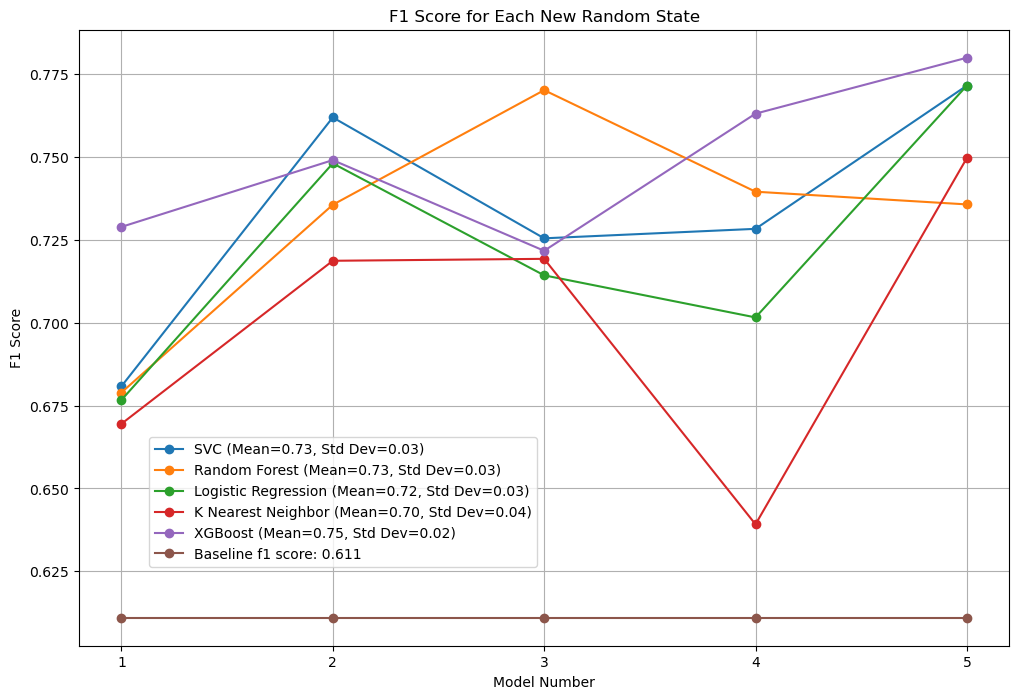

In [113]:
# Plotting

x_values = [1, 2, 3, 4, 5]

mean_std_labels = []
for i, lst in enumerate([svc_test_scores, rf_test_scores, lr_test_scores, knc_test_scores, xgb_test_scores], 1):
    mean_val = np.mean(lst)
    std_val = np.std(lst)
    if i == 1:
        mean_std_labels.append(f'SVC (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 2:
        mean_std_labels.append(f'Random Forest (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 3:
        mean_std_labels.append(f'Logistic Regression (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 4:
        mean_std_labels.append(f'K Nearest Neighbor (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 5:
        mean_std_labels.append(f'XGBoost (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')


f1_baseline_scores = [0.611] * len(x_values)

# Plotting
plt.figure(figsize=(12, 8))  

plt.plot(x_values, svc_test_scores, label=mean_std_labels[0], marker='o')
plt.plot(x_values, rf_test_scores, label=mean_std_labels[1], marker='o')
plt.plot(x_values, lr_test_scores, label=mean_std_labels[2], marker='o')
plt.plot(x_values, knc_test_scores, label=mean_std_labels[3], marker='o')
plt.plot(x_values, xgb_test_scores, label=mean_std_labels[4], marker='o')
plt.plot(x_values, f1_baseline_scores, label='Baseline f1 score: 0.611', marker='o')

plt.xlabel('Model Number')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each New Random State')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.35))  
plt.xticks(x_values) 

plt.grid(True)
plt.show()

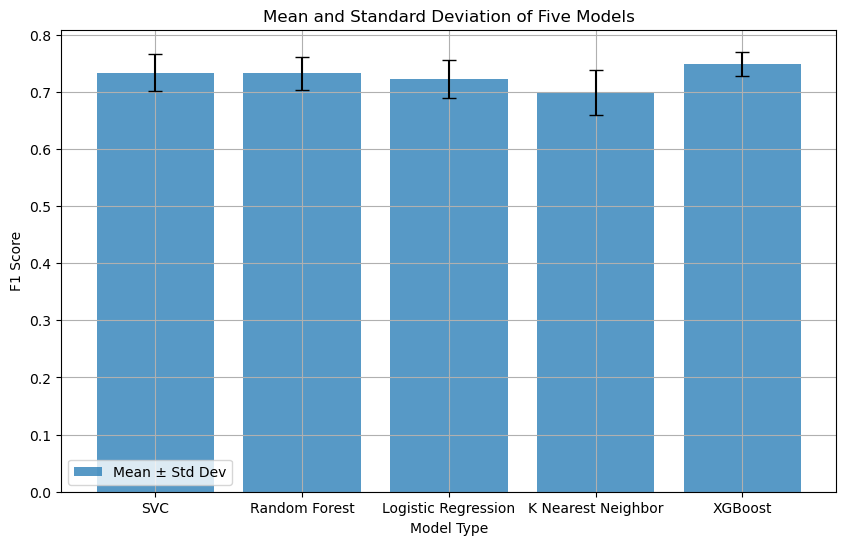

In [106]:
#Plot Averages and Standard Deviations

# Example data
categories = ['SVC', 'Random Forest', 'Logistic Regression', 'K Nearest Neighbor', 'XGBoost']

# Calculate mean and standard deviation for each list
means = [np.mean(lst) for lst in [svc_test_scores, rf_test_scores, lr_test_scores, knc_test_scores, xgb_test_scores]]
std_devs = [np.std(lst) for lst in [svc_test_scores, rf_test_scores, lr_test_scores, knc_test_scores, xgb_test_scores]]

# Plotting
plt.figure(figsize=(10, 6))

# Plot means with error bars representing standard deviations
plt.bar(categories, means, yerr=std_devs, capsize=5, align='center', alpha=0.75, label='Mean ± Std Dev')

plt.xlabel('Model Type')
plt.ylabel('F1 Score')
plt.title('Mean and Standard Deviation of Five Models')

plt.legend()
plt.grid(True)
plt.show()

In [116]:
model = xgb_final_models[3]
test_set = xgb_test_sets[3]
y_test_set = xgb_y_sets[3]

y_test_pred = model.predict(test_set)
score = f1_score(y_test_set,y_test_pred, average='weighted')
# print(model.best_score_)
print(score)
# print(model.score(df_test,y_test))
# print(model.best_params_)

# save the output so I can use it later
import pickle
file = open('Model.save', 'wb')
pickle.dump((model,test_set,y_test_set),file)
file.close()

0.7630522088353413


In [118]:
import pickle
file = open('Model.save', 'rb')
model, test_set, y_test_set = pickle.load(file)
file.close()

np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(X.columns),nr_runs])

# test_score = model.score(X_test,y_test)
y_test_pred = model.predict(test_set)
score = f1_score(y_test_set,y_test_pred, average='weighted')
print('test score = ',score)
print('test baseline = ',f1_baseline_scores[3])
# loop through the features
for i in range(len(X.columns)):
    print('shuffling '+str(X.columns[i]))
    f1_scores = []
    for j in range(nr_runs):
        X_test_shuffled = test_set.copy()
        X_test_shuffled[X.columns[i]] = np.random.permutation(test_set[X.columns[i]].values)
        y_test_pred_shuffled = model.predict(X_test_shuffled)
        f1_scores.append(f1_score(y_test_set, y_test_pred_shuffled, average='weighted'))
    print('   shuffled test score:',np.around(np.mean(f1_scores),3),'+/-',np.around(np.std(f1_scores),3))
    scores[i] = f1_scores

test score =  0.7630522088353413
test baseline =  0.611
shuffling N_Days
   shuffled test score: 0.68 +/- 0.036
shuffling Age
   shuffled test score: 0.742 +/- 0.024
shuffling Sex
   shuffled test score: 0.761 +/- 0.004
shuffling Ascites
   shuffled test score: 0.761 +/- 0.005
shuffling Hepatomegaly
   shuffled test score: 0.769 +/- 0.008
shuffling Spiders
   shuffled test score: 0.758 +/- 0.009
shuffling Edema
   shuffled test score: 0.762 +/- 0.006
shuffling Bilirubin
   shuffled test score: 0.736 +/- 0.014
shuffling Cholesterol
   shuffled test score: 0.756 +/- 0.008
shuffling Albumin
   shuffled test score: 0.767 +/- 0.012
shuffling Copper
   shuffled test score: 0.738 +/- 0.025
shuffling Alk_Phos
   shuffled test score: 0.748 +/- 0.017
shuffling SGOT
   shuffled test score: 0.765 +/- 0.01
shuffling Tryglicerides
   shuffled test score: 0.754 +/- 0.018
shuffling Platelets
   shuffled test score: 0.749 +/- 0.017
shuffling Prothrombin
   shuffled test score: 0.709 +/- 0.026
shuffling

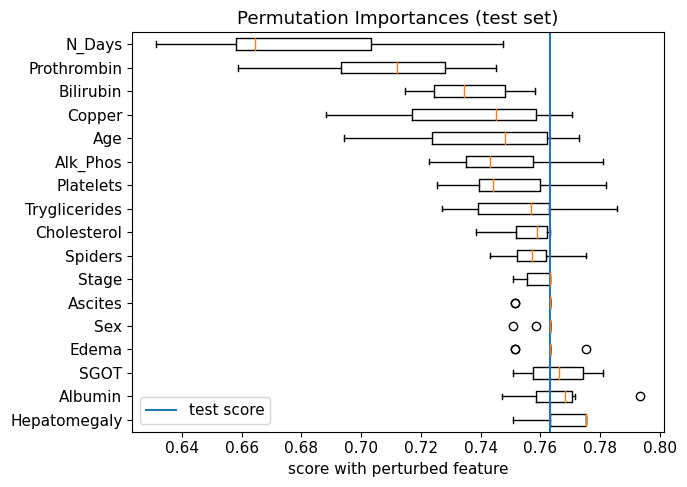

In [120]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(7,5))
plt.boxplot(scores[sorted_indcs].T,labels=X.columns[sorted_indcs],vert=False)
plt.axvline(score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

#issue is that they are all correlated

In [ ]:
# def StratKFoldF1_scaled(X, y, ML_Algo, param_grid):
#     '''Main function that can be used to train our models, 
#     -- preprocesses with StratifiedKFold, 
#     -- CV is GridSearchCV
#     -- F1 Score as evaluation metric
#     '''
#     nr_states = 5
#     test_scores = []
#     final_models = []
#     for j in range(20):
#         categorical_transformer = Pipeline(steps=[
#                 ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
#                 ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

#         # ordinal encoder
#         #Make the missing values categories
#         ordinal_transformer = Pipeline(steps=[
#             ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
#             ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

#             ])

#         # standard scaler
#         numeric_transformer = Pipeline(steps=[
#             ('scaler', StandardScaler()), 
#             ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=random_state), max_iter=j, random_state=random_state))])


#         preprocessor = ColumnTransformer(
#             transformers=[
#                 ('num', numeric_transformer, std_ftrs),
#                 ('cat', categorical_transformer, onehot_ftrs),
#                 ('ord', ordinal_transformer, ordinal_ftrs)])
#         for i in range(nr_states):
#             # first split to separate out the test set
#             X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

#             # StratifiedKFold to split  other
#             kf = StratifiedKFold(n_splits=6,shuffle=True,random_state=42*i)

#             #Scale again
#             scale = StandardScaler()

#             #Under the hood pipeline
#             pipe = make_pipeline(preprocessor,scale, ML_Algo)

#             #GridSearchCV with StratifiedKFold and f1 as scoring
#             grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'f1_weighted',
#                                 cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
            
#             # this line actually fits the model on other
#             grid.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
#             # save results into a data frame. feel free to print it and inspect it
#             results = pd.DataFrame(grid.cv_results_)
#             #print(results)

#             print('best model parameters:',grid.best_params_)
#             print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
#             # save the model
#             final_models.append(grid)
#             # calculate and save the test score
#             y_test_pred = final_models[-1].predict(X_test)
#             test_scores.append(f1_score(y_test,y_test_pred, average='weighted'))
#             # test_scores[i] = f1_score(y_test,y_test_pred, average='weighted')
#             print('test score:',test_scores[i])
#         return test_scores, final_models

# param_grid = {
#               'randomforestclassifier__max_depth': [1, 5, 10, 15, 20], # the max_depth should be smaller or equal than the number of features roughly
#               'randomforestclassifier__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1] # linearly spaced between 0.5 and 1
#               } 

# clf = RandomForestClassifier(random_state=42)

# rf_test_scores, rf_final_models = StratKFoldF1_scaled(X, y, clf, param_grid)

# print('list of test scores:', rf_test_scores)
# print('The mean of the test scores is:', np.mean(rf_test_scores))
# print('The standard deviation of the test scores is:', np.std(rf_test_scores))

In [125]:
# model = rf_final_models[1]
# feature_names = np.array(feature_names)
# # print('test score:',model.score(X_test,y_test))
# # print(model.best_estimator_[-1].feature_importances_)
# feature_importances = model.best_estimator_[-1].feature_importances_
# sorted_indcs = np.argsort(np.abs(feature_importances))

# plt.figure(figsize=(5, 3))
# plt.rcParams.update({'font.size': 11})
# plt.barh(np.arange(10), feature_importances[sorted_indcs[-10:]])
# plt.yticks(np.arange(10), feature_names[sorted_indcs[-10:]])
# plt.xlabel('Importance')
# plt.title('Top 10 Feature Importances (scaled)')
# plt.tight_layout()
# plt.show()

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

best_model = model.best_estimator_
# print(best_model)

importance_weight = best_model.get_booster().get_score(importance_type='weight')
importance_gain = best_model.get_booster().get_score(importance_type='gain')
importance_cover = best_model.get_booster().get_score(importance_type='cover')
importance_total_gain = best_model.get_booster().get_score(importance_type='total_gain')
importance_total_cover = best_model.get_booster().get_score(importance_type='total_cover')

df_weight = pd.DataFrame(list(importance_weight.items()), columns=['Feature', 'Weight'])
df_gain = pd.DataFrame(list(importance_gain.items()), columns=['Feature', 'Gain'])
df_cover = pd.DataFrame(list(importance_cover.items()), columns=['Feature', 'Cover'])
df_total_gain = pd.DataFrame(list(importance_total_gain.items()), columns=['Feature', 'Total Gain'])
df_total_cover = pd.DataFrame(list(importance_total_cover.items()), columns=['Feature', 'Total Cover'])

df_weight = df_weight.sort_values(by='Weight', ascending=False).head(10)
df_gain = df_gain.sort_values(by='Gain', ascending=False).head(10)
df_cover = df_cover.sort_values(by='Cover', ascending=False).head(10)
df_total_gain = df_total_gain.sort_values(by='Total Gain', ascending=False).head(10)
df_total_cover = df_total_cover.sort_values(by='Total Cover', ascending=False).head(10)

fig, axes = plt.subplots(5, 1, figsize=(10, 20))

sns.barplot(x='Weight', y='Feature', data=df_weight, ax=axes[0])
sns.barplot(x='Gain', y='Feature', data=df_gain, ax=axes[1])
sns.barplot(x='Cover', y='Feature', data=df_cover, ax=axes[2])
sns.barplot(x='Total Gain', y='Feature', data=df_total_gain, ax=axes[3])
sns.barplot(x='Total Cover', y='Feature', data=df_total_cover, ax=axes[4])

plt.tight_layout()
plt.show()

AttributeError: 'Pipeline' object has no attribute 'get_booster'

In [ ]:
#Local Feature Importance
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(model.best_estimator_[1])
# transform the test set
X_test_transformed = model.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 50 points in the test
shap_values = explainer.shap_values(X_test_transformed[:50])
print(np.shape(shap_values))

In [ ]:
#Class 0 is C, 1 and 2 are more severe outcomes
index = 9 # the index of the point to explain  #good ones are 10, 9, and 21
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

#This gets you the probability that the point falls into class 1! Pushed toward predicted probability (here 0.03). Huge for job
#Confident that they earn over 50k
#.76 is base prediction probability

In [ ]:
#Class 0 is C, 1 and 2 are more severe outcomes
index = 12 # the index of the point to explain  #good ones are 10, 9, and 21
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

#This gets you the probability that the point falls into class 1! Pushed toward predicted probability (here 0.03). Huge for job
#Confident that they earn over 50k
#.76 is base prediction probability

In [ ]:
matplotlib.rcParams.update({'font.size': 11})
ftr = 'num__N_Days'
indx = np.argwhere(feature_names==ftr)
plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:83,indx],shap_values[1][:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.title('SHAP Values by N_Days')
plt.show()

print(model.feature_names_in_)

In [ ]:
matplotlib.rcParams.update({'font.size': 11})
ftr = 'num__Cholesterol'
indx = np.argwhere(feature_names==ftr)
plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:83,indx],shap_values[1][:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.title('SHAP Values by Cholesterol')
plt.show()

print(model.feature_names_in_)

In [ ]:
ftr1 = 'num__N_Days'
ftr2 = 'num__Bilirubin'
indx1 = np.argwhere(feature_names==ftr1)
indx2 = np.argwhere(feature_names==ftr2)

plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:83,indx1],shap_values[1][:,indx1],c=X_test_transformed[:83,indx2])
plt.ylabel('shap value')
plt.xlabel(ftr1)
plt.colorbar(label=ftr2)
plt.title('SHAP Values by N_Days and Bilirubin')
plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confusion Matrix
# Predict on the test set

y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm,display_labels=['C', 'CL', 'D'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.title('Confusion Matrix on Test Set')
plt.show()

#Calculate all the metrics

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model.best_estimator_[-1].estimators_[0], filled=True, rounded=True)
plt.title('Outline of Individual Tree in Forest')
plt.show()


In [ ]:
# Plot decision boundaries
plt.figure(figsize=(10, 6))

# Generate a grid of points
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Use the classifier to predict the classes for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contour plot of decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundaries (Multiclass)')
plt.show()


### Questions
- Generally check that the results look okay
    - Have to make sure results are reproduceable?

- Getting f1 score to work:
    - Wanna use weighted cuz classification is imbalanced
    - works for accuracy score!
    - how do I get this to work with f1 given multiclass


- ASK: Inspect your model (e.g., confusion matrix, scatter plot of the true vs predicted values in regression, global/local feature importances).
    - A single model for each? The best model? Generally just check i'm training right amount of models
        - Look at how to determine which final model to select. Just select model that corresponds to highest score?
    - Should it be 5 baseline scores for the 5 random states?
    - ARE AVERAGE AND STDT SCORES OR WITHIN EACH RANDOM STATE FOR EACH FOLD?

- help with the convergence warnings

- Zipping my models

### TO DO
- Inspect your model (e.g., confusion matrix, scatter plot of the true vs predicted values in regression, global/local feature importances)
    - Gonna need to study coefficients of LogReg by scaling again
- Describe what steps you took to make your model interpretable. What did you learn?
- Model Table (CV)
- Reevaluate the param_grids and probably retrain
- CHECK EVERYTHING AND ASK QUESTIONS

### Choices
- StraifiedKFold
- Multivar Imputation (Reduced Features Model)
- Accuracy Score (f1 score)
- Global feature importance metrics vs. permutation feature importance (too much correlation)
    - Could even use SHAP